## IMPORT LIBRARIES

In [111]:
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib
import random
import csv

# Set up jupyter notebooks

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load the Dataset

In [16]:
df = pd.read_csv("/data/projects/car-insurance/data/Train_data.csv")
df.head(10)

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1
5,37.000000,management,married,tertiary,0,3737.000000,0,0,cellular,7,jul,1,-1,0,NaN,10:15:03,10:18:47,1
6,30.000000,blue-collar,married,secondary,0,1.000000,0,1,cellular,9,jul,1,-1,0,NaN,10:51:56,10:57:43,0
7,21.000000,student,single,primary,0,1596.000000,0,0,cellular,26,aug,1,93,2,failure,10:10:32,10:12:27,0
8,52.091704,admin.,married,secondary,0,101.453662,0,0,cellular,21,aug,3,-1,0,NaN,16:42:19,16:52:35,1
9,49.000000,technician,married,secondary,0,412.000000,0,0,cellular,19,aug,8,-1,0,NaN,15:33:44,15:55:17,1


# Exploratory Data Analysis (EDA)

In [11]:
num_customers = len(df)
print(f"The size of the dataset {num_customers}")
jobs = {row[1] for _, row in df.iterrows()}
print(f"The jobs {jobs}")
marital_statuses = {row[2] for _, row in df.iterrows()}
print(f"The marital status {marital_statuses}")
edu_levels = {row[3] for _, row in df.iterrows()}
print(f"The education levels {edu_levels}")
print(f"The minimum balance of a customer={min(df['balance_amt'])}")
print(f"The maximum balance of a customer={max(df['balance_amt'])}")
num_household_insurance = len([row[6] for _, row in df.iterrows() if row[6]==1])
print(f"The number of customers with household insurance={num_household_insurance}")
num_car_loans = len([row[7] for _, row in df.iterrows() if row[7]==1])
print(f"The number of customers with car loans = {num_car_loans}")
comm_methods = {row[8] for _, row in df.iterrows()}
print(f"The communication methods {comm_methods}")
print(f"The maximum number of contacts = {max(df['no_of_contacts'])}")
print(f"The minimum number of contacts = {min(df['no_of_contacts'])}")
print(f"The maximum number of days of previous contact = {max(df['days_passed'])}")
print(f"The maximum number of previous attempts = {max(df['prev_attempts'])}")
outcomes = {row[14] for _, row in df.iterrows()}
print(f"The outcomes = {outcomes}")
num_yes = len([row[17] for _, row in df.iterrows() if row[17]==1])
num_no = len([row[17] for _, row in df.iterrows() if row[17]==0])
print(f"The number of customers that said yes = {num_yes}, and no = {num_no}")

The size of the dataset 3102
The jobs {'management', nan, 'unemployed', 'services', 'housemaid', 'admin.', 'student', 'technician', 'self-employed', 'blue-collar', 'entrepreneur', 'retired'}
The marital status {'divorced', 'married', 'single'}
The education levels {'tertiary', nan, 'primary', 'secondary'}
The minimum balance of a customer=-3058.0
The maximum balance of a customer=52587.0
The number of customers with household insurance=1443
The number of customers with car loans = 355
The communication methods {nan, 'cellular', 'telephone'}
The maximum number of contacts = 43
The minimum number of contacts = 1
The maximum number of days of previous contact = 854
The maximum number of previous attempts = 58
The outcomes = {nan, 'other', 'failure', 'success'}
The number of customers that said yes = 1760, and no = 1342


## Set up the plots backend

In [12]:
%matplotlib inline
print(matplotlib.__version__)

3.4.1


In [ ]:
## 

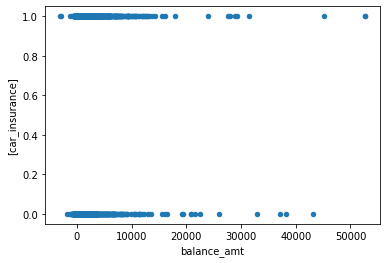

In [79]:
df.plot(x="balance_amt", y=["car_insurance"], kind="scatter")
plt.show()

## Create a series from a multi-column dataframe

In [41]:
# First I want to drop all the nans
df1 = df[df["Outcome"].notna()]
# Convert to a series
outcome_series = df1["Outcome"].squeeze()
outcome_counts = outcome_series.value_counts()
print(outcome_counts)
# plt.show()

failure    309
success    299
other      143
Name: Outcome, dtype: int64


## Remove rows based on conditional statements for column

In [74]:
df_success = df[df["Outcome"] == "success"]
df_failure = df[df["Outcome"] == "failure"]
df_other = df[df["Outcome"] == "other"]
df_nan = df[df["Outcome"].isna()]

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.0,blue-collar,married,primary,0,1112.0,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
2,36.0,services,single,NaN,0,281.0,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.0,technician,single,secondary,0,540.0,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
5,37.0,management,married,tertiary,0,3737.0,0,0,cellular,7,jul,1,-1,0,NaN,10:15:03,10:18:47,1
6,30.0,blue-collar,married,secondary,0,1.0,0,1,cellular,9,jul,1,-1,0,NaN,10:51:56,10:57:43,0


## Create Pie charts from series

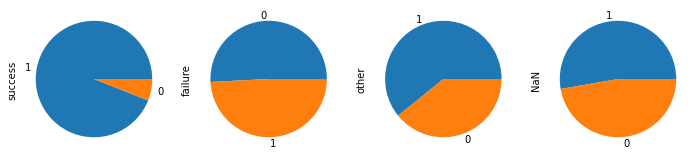

In [75]:
s_success = df_success["car_insurance"].squeeze()
s_failure = df_failure["car_insurance"].squeeze()
s_other = df_other["car_insurance"].squeeze()
s_nan = df_nan["car_insurance"].squeeze()
s_success_counts = s_success.value_counts()
s_failure_counts = s_failure.value_counts()
s_other_counts = s_other.value_counts()
s_nan_counts = s_nan.value_counts()
fig, ax = plt.subplots(ncols=4, figsize=(12,12))
pie_success = s_success_counts.plot(kind="pie", label="success", ax=ax[0])
pie_failure = s_failure_counts.plot(kind="pie", label="failure", ax=ax[1])
pie_other = s_other_counts.plot(kind="pie", label="other", ax=ax[2])
pie_nan = s_nan_counts.plot(kind="pie", label="NaN", ax=ax[3])
plt.show()

## More Pie Charts for education levels


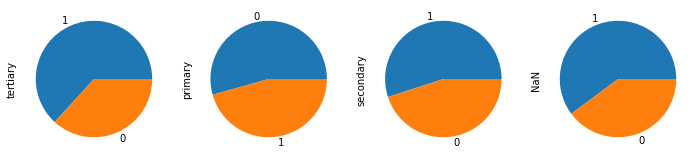

In [82]:
df_tertiary = df[df["education_level"] == "tertiary"] 
df_primary = df[df["education_level"] == "primary"] 
df_secondary = df[df["education_level"] == "secondary"] 
df_nan = df[df["education_level"].isna()] 
s_tertiary = df_tertiary["car_insurance"].squeeze()
s_primary = df_primary["car_insurance"].squeeze()
s_secondary = df_secondary["car_insurance"].squeeze()
s_nan = df_nan["car_insurance"].squeeze()
s_tertiary_counts = s_tertiary.value_counts()
s_primary_counts = s_primary.value_counts()
s_secondary_counts = s_secondary.value_counts()
s_nan_counts = s_nan.value_counts()
fig, ax = plt.subplots(ncols=4, figsize=(12,12))
pie_tertiary = s_tertiary_counts.plot(kind="pie", label="tertiary", ax=ax[0])
pie_primary = s_primary_counts.plot(kind="pie", label="primary", ax=ax[1])
pie_secondary = s_secondary_counts.plot(kind="pie", label="secondary", ax=ax[2])
pie_nan = s_nan_counts.plot(kind="pie", label="NaN", ax=ax[3])
plt.show()

## Analyze relationship between balance amount and purchase car insurance in current campaign

# Data Cleaning and Data Preprocessing

# Prediction for Test Dataset

In [86]:
df_test = pd.read_csv("/data/projects/car-insurance/data/Test_data.csv")
print(f"The number of entries in test dataset={len(df_test)}")

The number of entries in test dataset=935


In [104]:
# This is a basic algorithm to test submissions and formatting of submissions
target = []
def rand50():
    return random.choice([0,1])
def rand75():
    return rand50() | rand50()
for _, row in df_test.iterrows():
    if row["Outcome"]!="success":
        target.append(rand50())
    else:
        target.append(1)

## Save data to a csv file 

In [113]:
with open("/data/projects/car-insurance/data/prediction_results.csv", "w") as csv_file:
    fieldnames = ["prediction"]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for pred in target:
        writer.writerow({"prediction": str(pred)})


In [ ]:
# res = pd.DataFrame(predictions)
# res.index = test_new.index
# res.columns = ["prediction"]
# res.to_csv("prediction_results.csv", index=False)